# Load the dataset

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# You can find the data under https://drive.google.com/drive/folders/1e550az93U3_kfRBbVY5PZnMKYwGYmHqi?usp=sharing

import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/drive/My Drive/HW1/train_data.csv")
train_label = pd.read_csv("/content/drive/My Drive/HW1/train_label.csv")

test_data = pd.read_csv("/content/drive/My Drive/HW1/test_data.csv")
test_label = pd.read_csv("/content/drive/My Drive/HW1/test_label.csv")

In [94]:
# show random samples from the training data
train_data.sample(5)
# One line of code

,id,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,f_worker,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes
561,562,24,1546,4,4,24,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
442,443,20,2629,2,3,29,2,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1
222,223,12,707,4,2,30,2,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0
184,185,18,884,4,4,36,1,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1
664,665,6,1047,2,4,50,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0


# Train Decision Tree with default parameters

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree using the whole training data with **entropy** criteria

decisionTree = DecisionTreeClassifier(criterion = "entropy")
decisionTree.fit(train_data,train_label)

# Estimate the prediction of test data
test_pred = decisionTree.predict(test_data)

# Calculate accuracy of test data
from sklearn.metrics import accuracy_score
TestAcc = accuracy_score(test_label,test_pred)
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 68.59903%


# FineTune Decision Tree parameters

1- Spliting dataset into train and validation 

In [0]:
# Split training data to 70% training and 30% validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data,train_label,test_size=0.3)

2- FineTune minimum sample split

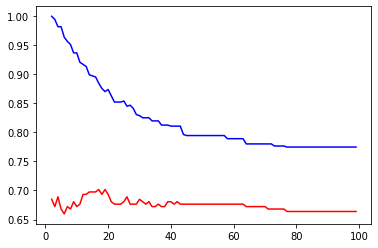

In [97]:
min_samples_splits = range(2, 100)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:
  
  # Fit the tree using the 70% portion of the training data
  decisionTree = DecisionTreeClassifier(min_samples_split=min_samples_split)
  decisionTree.fit(x_train,y_train)

  # Evaluate on Training set
  train_pred = decisionTree.predict(x_train)
  train_acc = accuracy_score(y_train,train_pred)
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_pred = decisionTree.predict(x_val)
  val_acc = accuracy_score(y_val,val_pred)
  val_results.append(val_acc)
  
# Ploting
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [98]:
# Choose the best minimum split sample based on the plot
Best_minSampl = min_samples_splits[np.argmax(val_results)] 

# Train decision tree using the full training data and the best minimum split sample
decisionTree = DecisionTreeClassifier(min_samples_split=Best_minSampl)
decisionTree.fit(train_data,train_label)
# Estimate the prediction of the test data
test_pred = decisionTree.predict(test_data)

# Calculate accuracy of test data
TestAccDes = accuracy_score(test_label,test_pred)
print("Testing Accuracy = %.5f%%" % (TestAccDes * 100))

Testing Accuracy = 67.14976%


# Now, apply the same procedure but using KNN instead of decision tree 

# For finetuning, find the best value of K to use with this dataset.

In [99]:
# Write your code here

from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = range(1,30,2)

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  # Follow what we did in decision tree part
  kNN = KNeighborsClassifier(n_neighbors = k)
  kNN.fit(x_train,y_train)

  score = kNN.score(x_val, y_val)
  #print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
  accuracies.append([score,k])

# Train KNN using the full training data with the best K that you found

kNN = KNeighborsClassifier(n_neighbors=int(max(accuracies,key=lambda x: x[0])[1]))
kNN.fit(train_data,train_label)

# Testing
test_pred = kNN.predict(test_data)
TestAcc = accuracy_score(test_label,test_pred)
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 71.01449%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

# Bonus

# Apply gridsearch using decision tree on any hyperparameter(s) of your choice, you have to beat your previous obtained accuracies to get the bonus


In [100]:
# Write your code here
from sklearn.model_selection import GridSearchCV

#min10
params = {'max_depth':list(range(1,20)),'min_samples_split':list(range(2,10)),'max_features':['auto','log2',None],'criterion':['entropy']}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=True,n_jobs = -1,cv=5)
grid_search_cv.fit(train_data,train_label)

Fitting 5 folds for each of 456 candidates, totalling 2280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2280 out of 2280 | elapsed:    9.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max

In [101]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_split': 3}

In [103]:
grid_search_cv.best_score_

0.7162725897619616

In [0]:
newTree=grid_search_cv.best_estimator_

In [105]:
newTree.fit(train_data,train_label)
test_pred = newTree.predict(test_data)
TestAccDesBonus = accuracy_score(test_label,test_pred)
print("Testing Accuracy = %.5f%%" % (TestAccDesBonus * 100))

Testing Accuracy = 73.42995%


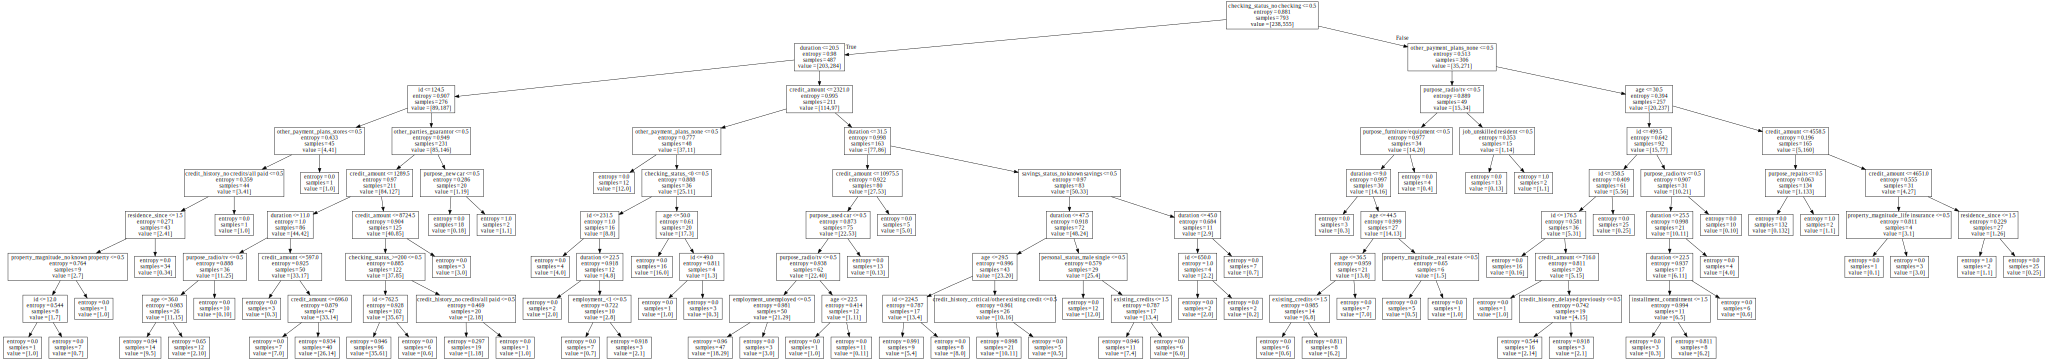

In [106]:
import graphviz
from sklearn.tree import export_graphviz
# dot is a graph description language
dot = export_graphviz(newTree, out_file=None, 
                           feature_names=train_data.keys()) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph

In [107]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_label,test_pred)

array([[ 25,  37],
       [ 18, 127]])

# Report: Write a summary of your approach to this problem; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what decision trees are, assuming they are known to people in your research area).

Must include statements such as:


*   Include the problem definition: 1-2 lines
*   Talk about train/val/test sets, size and how split.
*   State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data…."
*   Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)



# Write your report in this cell

The main problem is obtaining a good accuracy for the decision tree model since the dataset is imbalanced. 

* It causes the machine learning model to be more biased towards majority class. 
* It causes poor classification of minority classes.

The minority class can be upsampled in order to solve the problem stated above.SMOTE(Synthetic Minority Oversampling Technique)
 
For validation step the algorithm GridSearchCV automatically uses StratifiedKFold().
* Train / Test size is 0.7 / 0.3 (a common splitting)
* Validation via StratifiedKFold() 
  * K = 5 

The dataset contains some irrelevant features such as '*id*' column where it does not contain any relationship with credit risk.

Hyperparameters Used for GridSearchCV and result regarding the best parameters:

'*{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_split': 3}*'
 
 * criterion:
    * 'gini' and 'entropy' almost similiar but Gini is intended for continuous attributes, and Entropy for attributes that occur in classes.
    
 * max_depth:
  * If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
  * Deeper the tree is allowed to grow,gets more complex and might overfit on train data which would work fine until the test data is used to inspect the performance metrics of the model.
 * max_features:
  * If not stated , max_feature = n_feature.
  * The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
  * It affects efficiency majorly since every looking for a partition in every split is exhausting.
 * min_samples_split:
  * Used in order to set a value for minimum number of samples required to split an internal node.Effective in order to solve overfitting issues. 

Speed of the algorithm is correlated with the range of the parameters times number of K for Cross Validation times complexity of the building step and prediction step of model.Simply we can state that the range for all parameters as '*r*',number of iteration while cross validating as '*k*' and number of parameters to look as '*t*' we have $O(kr^t)$ for GridSearchCV without taking account the complexity of building of the model.Time complexity of the model would be $O(mn * log(n))$.

